# Taxi Data Preparation

## Imports

In [28]:
import pandas as pd
from datetime import datetime 
import seaborn as sns

In [29]:
# Import Taxi Trip Datset
taxi_trips = pd.read_csv('data/input/Taxi_Trips_-_2022.csv')
taxi_trips

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,bcfa19f2539021c054809d4c3993d226996ae095,368ce5511598af2cc07efdb68067d381174fdac1d47a28...,01/01/2022 12:00:00 AM,01/01/2022 12:00:00 AM,152.0,0.10,NaN,NaN,NaN,NaN,...,0.0,3.75,Cash,Medallion Leasin,NaN,NaN,NaN,NaN,NaN,NaN
1,2aba69ff015f9ea8e7bff43cab7eddb228f34a12,449fa4909552757130d09d98ebc7770e2dd94579036b0e...,01/01/2022 12:00:00 AM,01/01/2022 12:30:00 AM,2360.0,17.44,NaN,NaN,NaN,8.0,...,5.0,52.75,Cash,Flash Cab,NaN,NaN,NaN,41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,01/01/2022 12:00:00 AM,01/01/2022 12:00:00 AM,536.0,4.83,NaN,NaN,28.0,22.0,...,0.0,14.75,Cash,Globe Taxi,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.922761,-87.699155,POINT (-87.6991553432 41.9227606205)
3,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,897.0,2.07,NaN,NaN,8.0,32.0,...,1.5,11.25,Cash,Sun Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
4,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,01/01/2022 12:00:00 AM,01/01/2022 12:30:00 AM,2200.0,2.48,NaN,NaN,8.0,32.0,...,0.0,11.50,Mobile,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382420,f5ba11ba1d2f0dd11c598d05481947e19c8e1a17,0cbf5c0f6aca3628d77c7b6fe89715757ed402a70b0f8b...,12/31/2022 11:45:00 PM,12/31/2022 11:45:00 PM,539.0,1.85,NaN,NaN,32.0,28.0,...,0.0,11.48,Mobile,Globe Taxi,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
6382421,f8fad61a583724263dcc628c822ec835f212665d,081758ced4767105bfa217f7b0784d72d37e12a016fe2a...,12/31/2022 11:45:00 PM,01/01/2023 12:30:00 AM,3029.0,12.93,NaN,NaN,NaN,38.0,...,0.0,40.50,Cash,5 Star Taxi,NaN,NaN,NaN,41.812949,-87.617860,POINT (-87.6178596758 41.8129489392)
6382422,f88a3f1bc24e4afa13d6a5697be43d953f2065cd,96c3fa383c9adacc965af778248d6ef1b3a20ada7e623e...,12/31/2022 11:45:00 PM,01/01/2023 12:00:00 AM,449.0,1.66,NaN,NaN,8.0,28.0,...,4.0,11.75,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
6382423,f7d9a0b1514d58cb2af513b76759b999b67e5d11,835869d6df51f9ec6e53cb4ac6a1f9e386c26f948cdcca...,12/31/2022 11:45:00 PM,01/01/2023 12:00:00 AM,321.0,0.77,1.703108e+10,1.703108e+10,8.0,8.0,...,1.0,17.00,Credit Card,Taxicab Insurance Agency Llc,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495)


## Format

In [30]:
#attribute types
taxi_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6382425 entries, 0 to 6382424
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

In [31]:
#transform the Timestamps from object to usable datetime
taxi_trips['Trip Start Timestamp'] = pd.to_datetime(taxi_trips['Trip Start Timestamp'])
taxi_trips['Trip Start Timestamp'] = pd.to_datetime(taxi_trips['Trip Start Timestamp'], format='%Y-%m-%d %H:%M')
taxi_trips['Trip End Timestamp'] = pd.to_datetime(taxi_trips['Trip End Timestamp'])
taxi_trips['Trip End Timestamp'] = pd.to_datetime(taxi_trips['Trip End Timestamp'], format='%Y-%m-%d %H:%M')
#to extract for example the hour use:
#taxi_trips['Trip Start Timestamp'].dt.strftime('%H')

## NaN Values

In [32]:
#check for null values
taxi_trips.isnull().sum()

#Census Tract too big to delete
#Community Area null means outside Chicago -> usable
#Centroid null means privat or outside -> usable with restriction
#'Trip Seconds' not calculable due to inaccurate Timestamps

Trip ID                             0
Taxi ID                           354
Trip Start Timestamp                0
Trip End Timestamp                212
Trip Seconds                     1465
Trip Miles                         56
Pickup Census Tract           3758594
Dropoff Census Tract          3707094
Pickup Community Area          513853
Dropoff Community Area         633684
Fare                             3536
Tips                             3536
Tolls                            3536
Extras                           3536
Trip Total                       3536
Payment Type                        0
Company                             0
Pickup Centroid Latitude       511551
Pickup Centroid Longitude      511551
Pickup Centroid Location       511551
Dropoff Centroid Latitude      597931
Dropoff Centroid Longitude     597931
Dropoff Centroid  Location     597931
dtype: int64

In [33]:
#drop specific null columns
columns_with_nan = ['Taxi ID', 'Trip End Timestamp', 'Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Extras', 'Trip Total']
taxi_trips = taxi_trips.dropna(subset=columns_with_nan)
taxi_trips.isnull().sum()

Trip ID                             0
Taxi ID                             0
Trip Start Timestamp                0
Trip End Timestamp                  0
Trip Seconds                        0
Trip Miles                          0
Pickup Census Tract           3755453
Dropoff Census Tract          3703951
Pickup Community Area          512639
Dropoff Community Area         632344
Fare                                0
Tips                                0
Tolls                               0
Extras                              0
Trip Total                          0
Payment Type                        0
Company                             0
Pickup Centroid Latitude       510345
Pickup Centroid Longitude      510345
Pickup Centroid Location       510345
Dropoff Centroid Latitude      596625
Dropoff Centroid Longitude     596625
Dropoff Centroid  Location     596625
dtype: int64

## Duplicates

In [34]:
#check if there are duplicate entries (measured with Trip ID)
display(taxi_trips['Trip ID'].duplicated(keep=False).any())

False

In [35]:
#check if there is only one taxi trip for a Taxi ID at the same time
sorted = taxi_trips.sort_values(by=['Taxi ID','Trip Start Timestamp'], ascending=True)
tmp = sorted[['Trip Start Timestamp','Trip End Timestamp', 'Taxi ID']].copy()

tmp['next_ride']= tmp['Trip Start Timestamp'].shift(periods=-1)
tmp['next_bike_id']= tmp['Taxi ID'].shift(periods=-1)

#compare the id & start time: if id is not same we are comparing two different bikes; if id is the same we need to check if start & end times are consistent
tmp['bike_id_check'] = tmp.apply(lambda x: True if ((x['Taxi ID'] == x['next_bike_id'])) else False, axis=1)
tmp = tmp.dropna()
tmp['check'] = tmp.apply(lambda x: True if ((x['next_ride'] >= x['Trip End Timestamp'])) else False, axis=1)

duplicates = tmp[(tmp['check']==False)&(tmp['bike_id_check']==True)]
duplicates.head()

,Trip Start Timestamp,Trip End Timestamp,Taxi ID,next_ride,next_bike_id,bike_id_check,check
195698,2022-01-21 12:15:00,2022-01-21 13:00:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,2022-01-21 12:15:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,True,False
223064,2022-01-24 11:15:00,2022-01-24 11:45:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,2022-01-24 11:15:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,True,False
430904,2022-02-11 12:45:00,2022-02-11 13:00:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,2022-02-11 12:45:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,True,False
437490,2022-02-11 19:15:00,2022-02-11 19:45:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,2022-02-11 19:15:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,True,False
465872,2022-02-14 12:00:00,2022-02-14 12:15:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,2022-02-14 12:00:00,0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...,True,False


In [36]:
#drop trips where taxi ID is used a second time in the same timeframe
indeces = list(duplicates.index)
taxi_trips = taxi_trips.drop(indeces, axis=0)
len(taxi_trips)

6242921

## Logic Preparation

### Trip Timestamp Logic

In [37]:
#check for trips where end time is ealier than start time
taxi_trips.loc[taxi_trips['Trip End Timestamp'] < taxi_trips['Trip Start Timestamp']]

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location


In [38]:
#check if earliest start time is in 2022
print(taxi_trips["Trip Start Timestamp"].min())
#check if latest end time is in 2022
print(taxi_trips["Trip End Timestamp"].max())

2022-01-01 00:00:00
2023-01-01 16:00:00


In [39]:
#drop all entries that end outside 2022
entries_outside = taxi_trips['Trip End Timestamp'] >= pd.to_datetime('2023-01-01 00:00:00')
taxi_trips = taxi_trips.drop(taxi_trips[taxi_trips['Trip End Timestamp'] >= pd.to_datetime('2023-01-01 00:00:00')].index)
taxi_trips["Trip End Timestamp"].max()

Timestamp('2022-12-31 23:45:00')

In [40]:
taxi_trips.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,6.242849e+06,6.242849e+06,2.559326e+06,2.610651e+06,5.736599e+06,5.619554e+06,6.242849e+06,6.242849e+06,6.242849e+06,6.242849e+06,6.242849e+06,5.738830e+06,5.738830e+06,5.654975e+06,5.654975e+06
mean,1.190935e+03,6.216502e+00,1.703147e+10,1.703141e+10,3.249140e+01,2.585083e+01,2.157005e+01,2.773749e+00,2.131810e-02,2.185130e+00,2.670758e+01,4.190011e+01,-8.768887e+01,4.189474e+01,-8.766256e+01
std,1.753779e+03,7.888368e+00,3.697896e+05,3.458297e+05,2.528840e+01,2.093979e+01,3.291342e+01,4.099253e+00,7.691139e+00,2.195305e+01,4.352822e+01,6.037701e-02,1.051870e-01,5.625689e-02,7.341523e-02
min,0.000000e+00,0.000000e+00,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.165192e+01,-8.791362e+01,4.166014e+01,-8.791362e+01
25%,4.570000e+02,8.500000e-01,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,4.187887e+01,-8.768752e+01,4.187887e+01,-8.766352e+01
50%,8.660000e+02,2.620000e+00,1.703132e+10,1.703132e+10,3.200000e+01,2.800000e+01,1.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.710000e+01,4.189503e+01,-8.763331e+01,4.189251e+01,-8.763331e+01
75%,1.620000e+03,1.117000e+01,1.703184e+10,1.703184e+10,4.500000e+01,3.200000e+01,3.325000e+01,4.000000e+00,0.000000e+00,2.000000e+00,4.083000e+01,4.194423e+01,-8.762519e+01,4.192269e+01,-8.762519e+01
max,8.634100e+04,2.967540e+03,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.900260e+03,4.960000e+02,6.666660e+03,8.888880e+03,9.900310e+03,4.201605e+01,-8.753071e+01,4.202122e+01,-8.753139e+01


### Validate range of 'Trip Seconds'

(0.0, 70000.0)

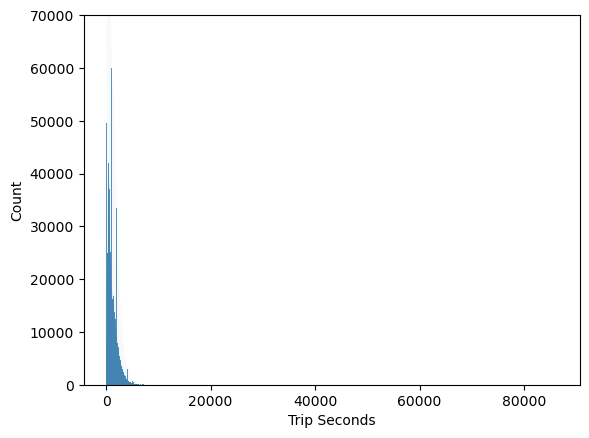

In [41]:
fig= sns.histplot(taxi_trips['Trip Seconds'])
fig.set_ylim(0,70000)

In [42]:
#drop very short and very long trips considering the seconds
upper_quantile = 0.999
print('Upper time: ', taxi_trips['Trip Seconds'].quantile(upper_quantile)) # 3.52 hours
print('Rows droped: ', len(taxi_trips[taxi_trips['Trip Seconds'] > taxi_trips['Trip Seconds'].quantile(upper_quantile)])) # 6243 rows out

lower_quantile = 0.05
print('Lower time: ', taxi_trips['Trip Seconds'].quantile(lower_quantile)) # 33 seconds
print('Rows droped: ', len(taxi_trips[taxi_trips['Trip Seconds'] < taxi_trips['Trip Seconds'].quantile(lower_quantile)])) # 311763 rows out

taxi_trips = taxi_trips[(taxi_trips['Trip Seconds'] <= taxi_trips['Trip Seconds'].quantile(upper_quantile)) 
                        & (taxi_trips['Trip Seconds'] >= taxi_trips['Trip Seconds'].quantile(lower_quantile))]
len(taxi_trips)

Upper time:  12688.280000010505
Rows droped:  6243
Lower time:  33.0
Rows droped:  311763


5924843

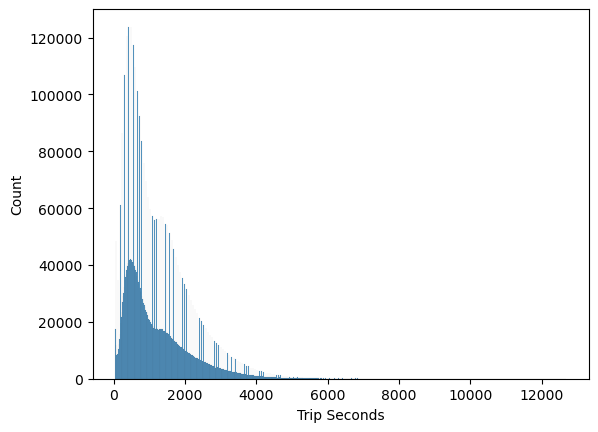

In [43]:
fig= sns.histplot(taxi_trips['Trip Seconds'])

### Validate range of 'Trip Miles'

(0.0, 300.0)

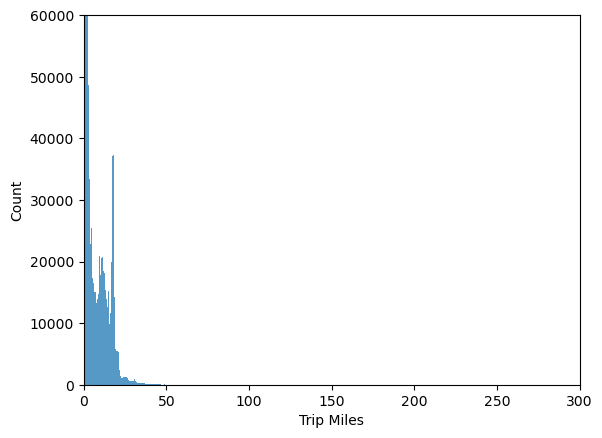

In [44]:
fig= sns.histplot(taxi_trips['Trip Miles'])
fig.set_ylim(0,60000)
fig.set_xlim(0,300)

In [45]:
#drop very short and very long trips considering the miles
upper_quantile = 0.9999
print('Upper miles: ', taxi_trips['Trip Miles'].quantile(upper_quantile)) # 86.87 miles
print('Rows droped: ', len(taxi_trips[taxi_trips['Trip Miles'] > taxi_trips['Trip Miles'].quantile(upper_quantile)])) # 593 rows out

lower_quantile = 0.1                                                                                      
print('Lower miles: ', taxi_trips['Trip Miles'].quantile(lower_quantile)) # 0.1 miles
print('Rows droped: ', len(taxi_trips[taxi_trips['Trip Miles'] < taxi_trips['Trip Miles'].quantile(lower_quantile)])) # 534656 rows out

taxi_trips = taxi_trips[(taxi_trips['Trip Miles'] <= taxi_trips['Trip Miles'].quantile(upper_quantile)) 
                        & (taxi_trips['Trip Miles'] >= taxi_trips['Trip Miles'].quantile(lower_quantile))]
len(taxi_trips)

Upper miles:  86.87031599998474
Rows droped:  593
Lower miles:  0.1
Rows droped:  534656


5389594

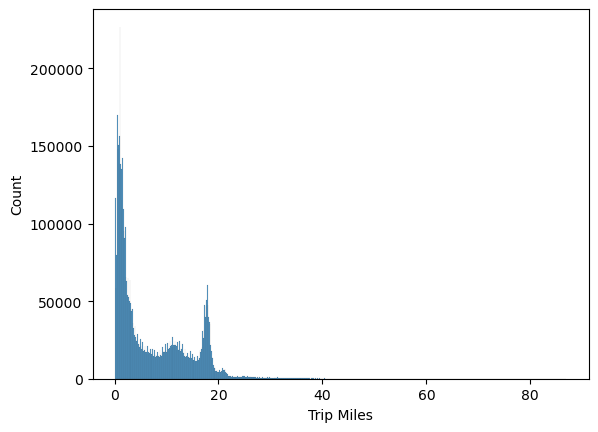

In [46]:
fig= sns.histplot(taxi_trips['Trip Miles'])

### Validate calculation of 'Trip Total'

In [47]:
#check if Trip Total is calculated correctly
#taxi_trips = taxi_trips.drop(taxi_trips[taxi_trips[['Fare', 'Tips', 'Tolls', 'Extras']].sum(axis=1) != taxi_trips['Trip Total']].index)
#len(taxi_trips.index)
#2Mil lost?

## Column Adjustment

In [48]:
#calculate the minutes out of the trip (column name changed below)
taxi_trips['Trip Seconds'] = taxi_trips['Trip Seconds'].apply(lambda x: x / 60).round(2)
taxi_trips['Trip Seconds'].head()

0     2.53
1    39.33
2     8.93
5    20.93
7     0.55
Name: Trip Seconds, dtype: float64

In [49]:
#rename columns
taxi_trips.rename(columns={'Trip ID' : 'trip_id', 'Taxi ID' : 'taxi_id', 'Trip Start Timestamp': 'start_time', 'Trip End Timestamp': 'end_time',
       'Trip Seconds' : 'minutes', 'Trip Miles' : 'miles', 'Pickup Census Tract' : 'pickup_census_tract', 'Dropoff Census Tract' : 'dropoff_census_tract',
       'Pickup Community Area' : 'pickup_community_area', 'Dropoff Community Area' : 'dropoff_community_area', 'Fare' : 'fare', 'Tips' : 'tips',
       'Tolls' : 'tolls', 'Extras' : 'extras', 'Trip Total' : 'total', 'Payment Type' : 'payment_type', 'Company' : 'company',
       'Pickup Centroid Latitude' : 'pickup_centroid_latitude', 'Pickup Centroid Longitude' : 'pickup_centroid_longitude',
       'Pickup Centroid Location' : 'pickup_centroid_location', 'Dropoff Centroid Latitude' : 'dropoff_centroid_latitude',
       'Dropoff Centroid Longitude' : 'dropoff_centroid_longitude', 'Dropoff Centroid  Location' : 'dropoff_centroid_location'}, inplace=True)
taxi_trips.columns

Index(['trip_id', 'taxi_id', 'start_time', 'end_time', 'minutes', 'miles',
       'pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'total',
       'payment_type', 'company', 'pickup_centroid_latitude',
       'pickup_centroid_longitude', 'pickup_centroid_location',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude',
       'dropoff_centroid_location'],
      dtype='object')

## Export

In [50]:
#save dataframe as new csv
taxi_trips.to_csv('data/prepared/taxi_trips.csv', index=False)